In this project I will invistigate the Sea Ice Extent.  
First I will invistigate the statistics of the Ice extent in the northern and Southern Hemisphere.  
Then I will try to find if there is a relation between Ice extent and (Sea Surface Temperture, fresh water input from rivers).

In [174]:
# install these packages if needed
install.packages('gifski')
install.packages('gganimate')
install.packages('transformr') # needed for the annualk animation figure

Installing gifski [1.12.0-2] ...
	OK [linked cache]
Installing gganimate [1.0.8] ...
	OK [linked cache]
Installing transformr [0.1.4] ...
	OK [linked cache]


In [175]:
# # importing the needed libraries 
library(readr)
library(readxl)
library(gifski)
library(ggplot2)
library(tidyverse)
library(gganimate)
library(transformr)

# Importing the Sea Icea data base from NSIDC

We used the 'Sea ice extent and area organized by year' data. It is obtained from National Snow and Ice Data Center NSIDC [website](https://nsidc.org/arcticseaicenews/sea-ice-tools/)


We will use the NH-Extent and SH-Extent data which contains sea ice extent data for the respective hemisphere. We chose the variable _Ice Sea Extent_ from the data because it is measured with a higher certainty than the _Ice Sea Area_ variable. 

Since the NSIDC data in Excel format, we invistigated it first in excel in our preliminary analysis. The data that we need ( The NH_sea_Ice and the SH_sea_Ice are the sheets 1 and 3)

In [176]:
# In this part of the code we download the excel from the NSIDC website.
# Then, In the next two steps:
#							We will work out the data from North Hemisphere NH sea ice
#							Then we will repeat the same work on data the South Hemisphere SH sea ice

# importing Sea ice extent and area organized by year from the NSIDC website  
NSIDC_url <- "https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx"

# Data source with meta data and Spreadsheet Descriptions can be found at
# https://nsidc.org/arcticseaicenews/sea-ice-tools/


# Download the excel file to a temporary location
temp_file_NSIDC <- tempfile()
download.file(NSIDC_url, temp_file_NSIDC, mode = "wb")

## Importing the North Hemisphere NH sea ice

 The North Hemisphere NH sea ice data is on the sheet (1) from the excel file. It has the monthly values and annual ones. I will wrangle this sheet and make it two times series:  
 The _NH_monthly_ for the **Monthly** Sea Ice in the northeren Hemisphere.  
 The _NH_annual_ for **Annual** Sea Ice in the northeren Hemisphere.


### Monthly North Hemisphere sea ice ``NH_monthly``

In [177]:
# Read sheet (1) from the excel file
NH_monthly <- read_excel(temp_file_NSIDC, sheet = 1)

# Rename the A column to 'year'
colnames(NH_monthly)[1] <- 'year'

# Remove the column N and O because;
#				column N is empty
#				column O has inncorrected 'Annual' value based on missing data
NH_monthly <- NH_monthly[, -c(14, 15)]


# View the data
NH_monthly

New names:
• `` -> `...1`
• `` -> `...14`


year,January,February,March,April,May,June,July,August,September,October,November,December
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1978,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,11.645,13.667
1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336
1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593
1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341
1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642
1983,14.942,16.006,16.085,15.172,13.491,12.296,10.570,8.186,7.395,9.334,11.461,13.299
1984,14.473,15.299,15.584,15.015,13.577,12.152,9.977,7.771,6.805,8.561,10.842,12.989
1985,14.725,15.466,15.886,15.357,14.073,12.219,9.744,7.402,6.698,8.546,11.025,13.050
1986,14.890,15.785,15.910,15.059,13.379,11.976,10.146,7.979,7.411,9.484,11.453,13.222


In [178]:
# Remove the first column of the data
NH_monthly <- NH_monthly[, -1]

# use pivot longer and keep only the data
NH_monthly <- pivot_longer(NH_monthly, January:December, names_to = "month", values_to = "extent_NH")[, "extent_NH"]

# Add the time_series as a date index column to NH_Extent_NSIDC_column
time_series <- seq(from = as.Date("1978-01-1"), to = as.Date("2023-12-1"), by = "1 month")
NH_monthly$date <- as.Date(time_series)

# We are doing this research in begin October 2023
# We need to remove the last three rows of NH_Extent_NSIDC_column because there is no measurments yet for all 2023
# There are also no measurments in the first ten months of 1978
NH_monthly <- NH_monthly[11:(nrow(NH_monthly)-3), ]

# Add (the year as integer) as a new column in NH_monthly
# This integer will be used later in the animation plot
NH_monthly$year <- as.integer(format(NH_monthly$date, "%Y"))

# Change the columns order 
NH_monthly <-NH_monthly[,3:1]

# View the updated dataframe
NH_monthly

year,date,extent_NH
<int>,<date>,<dbl>
1978,1978-11-01,11.645
1978,1978-12-01,13.667
1979,1979-01-01,15.414
1979,1979-02-01,16.175
1979,1979-03-01,16.342
1979,1979-04-01,15.447
1979,1979-05-01,13.857
1979,1979-06-01,12.530
1979,1979-07-01,10.311


In [179]:
# Here we will print out which measurment is missing in our NH data
missing_indices <- which(is.na(NH_monthly[['extent_NH']]))
NH_monthly$date[missing_indices]


[1] "1987-12-01" "1988-01-01"

In [180]:
# Interpolate the missing values in NH_Extent_NSIDC_column
NH_monthly$extent_NH <- approx(x = seq_along(NH_monthly$extent_NH),
                                          y = NH_monthly$extent_NH,
                                          xout = seq_along(NH_monthly$extent_NH))$y

NH_monthly

year,date,extent_NH
<int>,<date>,<dbl>
1978,1978-11-01,11.645
1978,1978-12-01,13.667
1979,1979-01-01,15.414
1979,1979-02-01,16.175
1979,1979-03-01,16.342
1979,1979-04-01,15.447
1979,1979-05-01,13.857
1979,1979-06-01,12.530
1979,1979-07-01,10.311


In [181]:
# Check if there is still any NA values in the NH_monthly
sum(is.na(NH_monthly$extent_NH))

[1] 0

The NH data is now a time series and there is no NA  
The following code will perform some exploratory data analysis on the imported NH data and provide some insights.

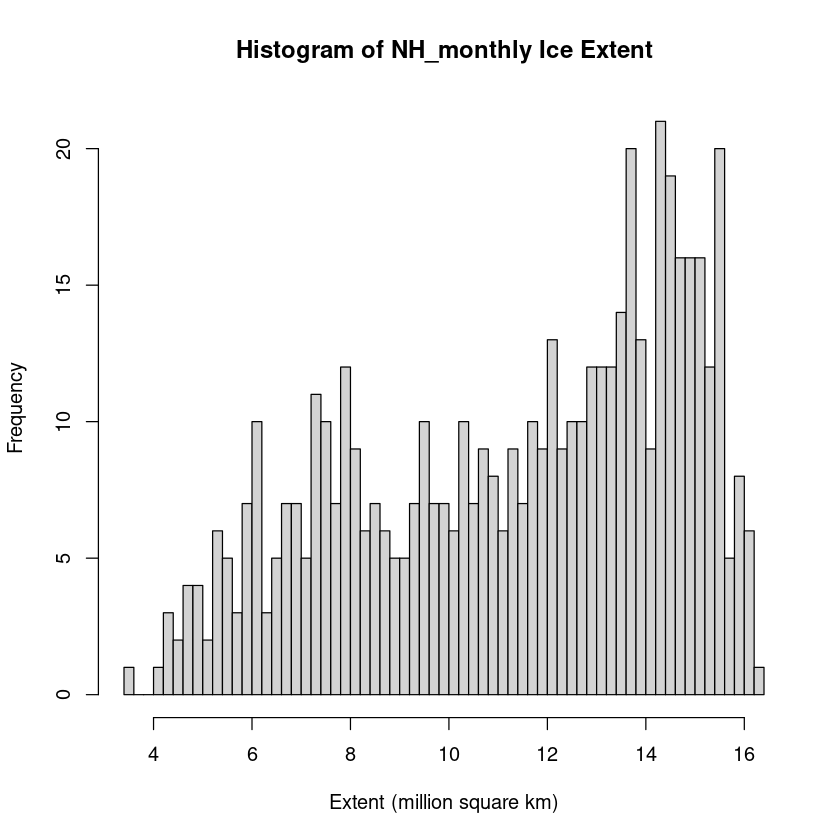

In [182]:
# Make a histogram of NH_monthly
hist(NH_monthly$extent_NH, main = "Histogram of NH_monthly Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 80)

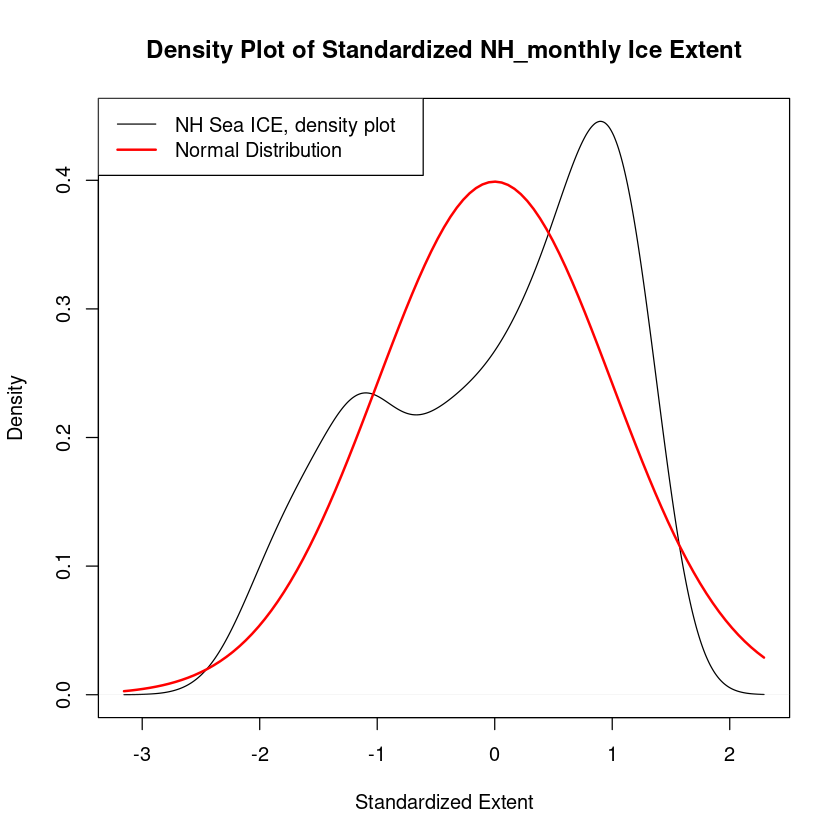

In [183]:
# Standardize the NH_monthly data
NH_monthly$z_value <- scale(NH_monthly$extent_NH)
# in the last line: The function 'scale()' standardizes the values of 'NH_monthly'
# This is done by subtracting the mean of the vector from each value and dividing the result by the standard deviation

# Create a density plot of the z values
plot(density(NH_monthly$z_value), main = "Density Plot of Standardized NH_monthly Ice Extent", xlab = "Standardized Extent", ylab = "Density")

# Overlay a normal distribution on the density plot
curve(dnorm(x, mean = mean(NH_monthly$z_value), sd = sd(NH_monthly$z_value)), add = TRUE, col = "red", lwd = 2)

# Add a legend
legend('topleft', legend = c("NH Sea ICE, density plot", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

previous visual inspection show that the North hemisphere Sea Ice (NH_monthly) data distribution is bimodal or even a multimodal and not a normal distribution. To confirm our visual inspection, we will run the Shapiro-Wilk test to check if the data is normal distribution.

In [184]:
# Run the Shapiro-Wilk test to check if the data is normally distributed
shapiro.test(NH_monthly$extent_NH)

# p-value is less than the chosen significance level (e.g., 0.05), we must reject the null hypothesis, indicating that the NH_monthly data is not normally distributed.


	Shapiro-Wilk normality test

data:  NH_monthly$extent_NH
W = 0.93632, p-value = 2.101e-14


The p-value of Shapiro-Wilk test is very low (2e-14), this confirm that the NH_monthly is **not** normally distributed

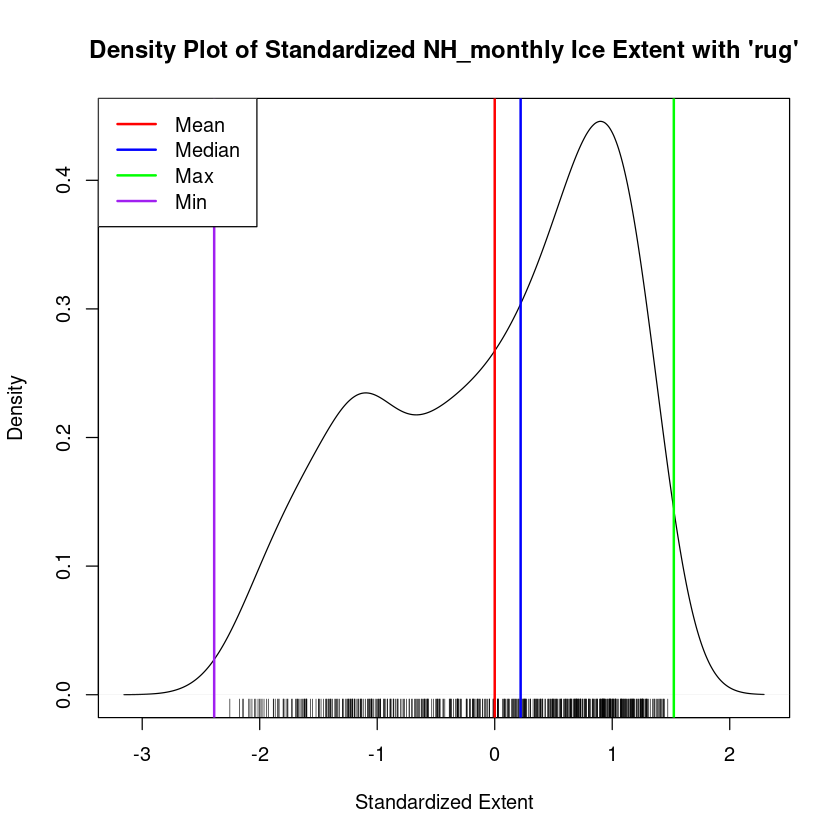

In [185]:
# Create a density plot of the z values with rug jitter
plot(density(NH_monthly$z_value), main = "Density Plot of Standardized NH_monthly Ice Extent with 'rug'", xlab = "Standardized Extent", ylab = "Density")
rug(jitter(NH_monthly$z_value))

# Add mean, median, max, and min as vertical lines
abline(v = mean(NH_monthly$z_value), col = "red", lwd = 2)
abline(v = median(NH_monthly$z_value), col = "blue", lwd = 2)
abline(v = max(NH_monthly$z_value), col = "green", lwd = 2)
abline(v = min(NH_monthly$z_value), col = "purple", lwd = 2)
# There is no mode value because all numeric values are unique 

# Add legend
legend("topleft", legend = c("Mean", "Median", "Max", "Min"), col = c("red", "blue", "green", "purple"), lwd = 2)

In [186]:
# Summary statistics of NH_monthly extent
summary(NH_monthly$extent_NH)

# The variance of NH_monthly extent
cat("The variance is:", round(var(NH_monthly$extent_NH), 1), "million (km to the Fourth power)", "\n")

# The standard deviation of NH_monthly extent
cat("Standard Deviation:", round(sd(NH_monthly$extent_NH), 1), "(million square km)", "\n")

# The range of NH_monthly extent
cat("The data range is:", round((range(NH_monthly$extent_NH)[2] - range(NH_monthly$extent_NH)[1]), 1), "(million square km)", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.566   8.543  12.084  11.364  14.281  16.342 

The variance is: 10.7 million (km to the Fourth power) 
Standard Deviation: 3.3 (million square km) 
The data range is: 12.8 (million square km) 


In [187]:
# Check the asymmetry of the data by invistigating the skewness using the e1071 package
library(e1071)
cat("skewness value of:", round(skewness(NH_monthly$extent_NH), 1), "suggests that the data is slightly left-skewed", "\n")

skewness value of: -0.4 suggests that the data is slightly left-skewed 


In [188]:
# The kurtosis of NH_monthly extent
# kurtosis tells about the "tailedness" of the distribution and how data is distributed in the tails compared to a normal distribution

cat("kurtosis value of:", round(kurtosis(NH_monthly$extent_NH), 4), "indicates a platykurtic distribution", "\n")

kurtosis value of: -1.0125 indicates a platykurtic distribution 


The kurtosis value of -1.0125 indicates a platykurtic distribution; means that the tails of the distribution are lighter or have fewer extreme values compared to a normal distribution. This means that the dataset has lighter tails and is less prone to outliers or extreme values than a normal distribution. This could mean that the data is more spread out and less concentrated in the center.

Normal Distribution Comparison: A normal distribution has a kurtosis of 3, so a kurtosis value of -1.0125 suggests that the dataset has thinner tails and is less peaked in the center compared to a normal distribution.

The previous interpeation of kurtosis makes the latest event of '6.4-Sigma Event: Antarctic Sea Ice' very clear unexpected outlier from this distrbution.

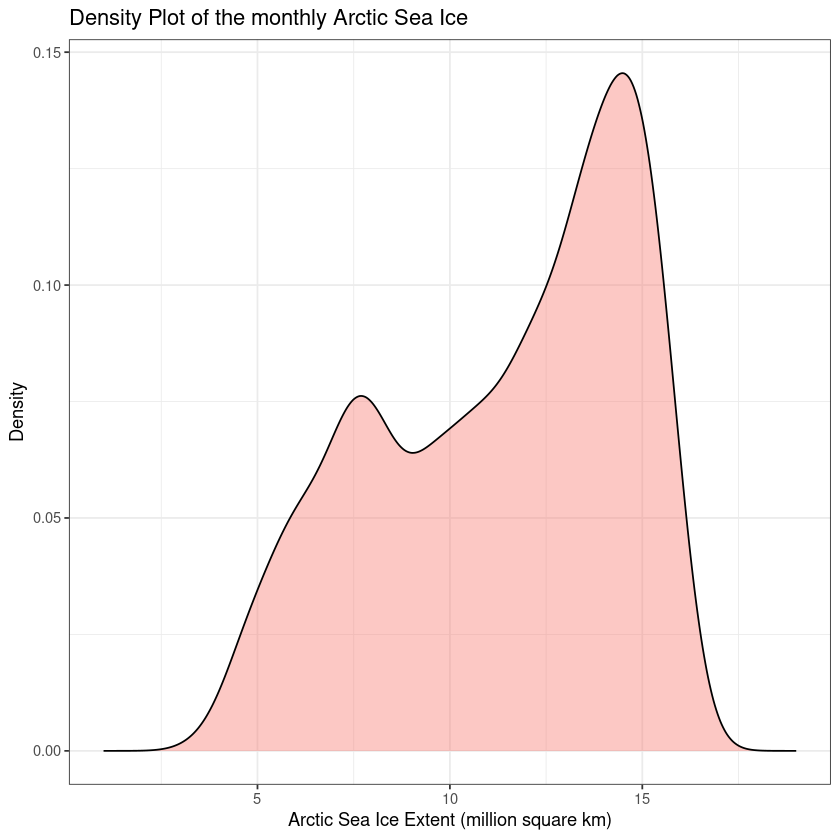

In [189]:
# Making a density plot that I will animate in the next step on annual basis
plot_to_animate <- ggplot() +
  geom_density(data = NH_monthly, aes(x = extent_NH, fill = "blue"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of the monthly Arctic Sea Ice") +
  xlim(1, 19) +
  theme_bw()+
  theme(legend.position = "none")

print(plot_to_animate)

In [190]:
# # We ran this part and then saved the result on GitHub. After that, it commented it to save the CPU. 
# # You could uncomment and rerun the code when the source data is updated, This way, you will get the latest SST and Sea Ice data.

# # I learned this animation in R from
# # https://www.datanovia.com/en/blog/gganimate-how-to-create-plots-with-beautiful-animation-in-r/

# theme_set(theme_bw())

# animated_plot <- plot_to_animate + transition_time(year) +
#   labs(title = "Year: {frame_time}") +
#   shadow_wake(wake_length = 0.1, alpha = FALSE)

# # Render the animation as a GIF
# animation_monthly_NH <- animate(animated_plot, renderer = gifski_renderer(), width = 800, height = 600)

# # Save the animated GIF
# anim_save("animation_monthly_NH.gif", animation_monthly_NH)

Here is the animated histogram for a year by year

![animated_plot.gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/animation_monthly_NH.gif)


The climatological cycles are part of the Climate variability. Examples of these Oscillations are the El Niño–Southern Oscillation, the Arctic oscillation, and the Antarctic oscillation.  
The previous plot is far affected by the climatological Cycles because it was an annual density plot. We will use a 20-year plot in the following visualization to alleviate the Climatic variability effect. The choice of the 20 years fits our data range and eliminates _most_ climatic oscillations. Nevertheless, it could not eliminate low-frequency oscillations like the Antarctic oscillation or the data measurement error.

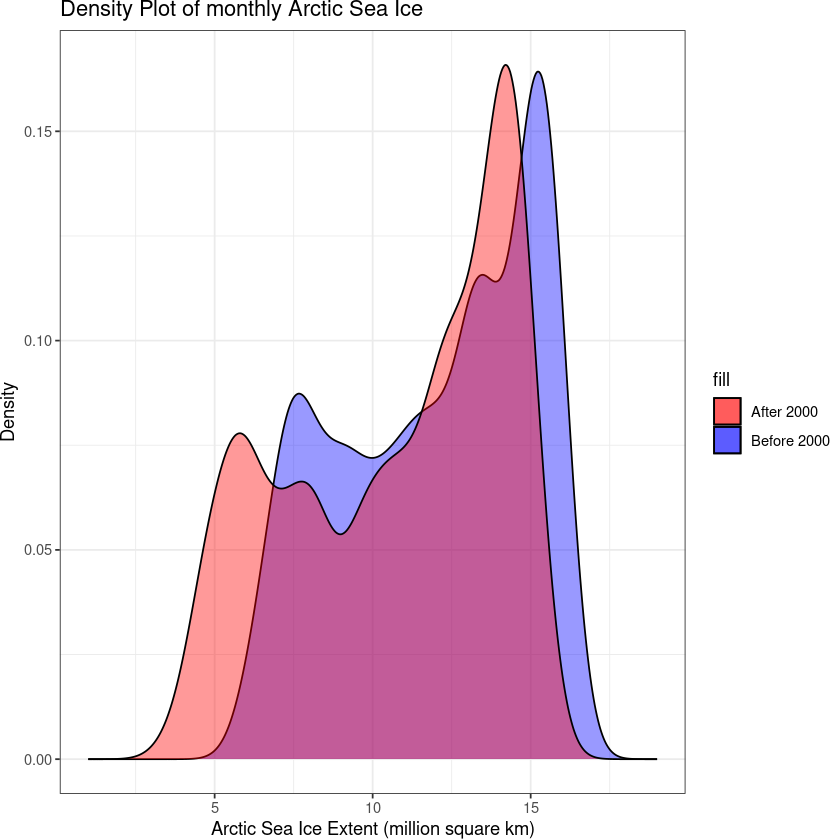

In [191]:
# Filter NH_monthly data before 2000
NH_monthly_before_2000 <- NH_monthly[NH_monthly$date < as.Date("2000-01-01"), ]

# Filter NH_monthly data after 2000
NH_monthly_after_2000 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01"), ]

# Create a new plot with both density plot, I used bandwidth parameter of 0.6
NH_density2groups <- ggplot() +
  geom_density(data = NH_monthly_before_2000, aes(x = extent_NH, fill = "Before 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_after_2000, aes(x = extent_NH, fill = "After 2000"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of monthly Arctic Sea Ice") +
  scale_fill_manual(values = c("Before 2000" = "blue", "After 2000" = "red")) +
  xlim(1, 19) +
  theme_bw() +
  theme(plot.margin = margin(l = 0, r = 0))

ggsave("NH_density2groups.png", plot = NH_density2groups, width = 10, height = 4)
print(NH_density2groups)

# I used the bandwidth of 0.6 in the density plot.
# The bandwidth determine the plot smoothness
# The bandwidth is same as the parameter of 'bins number' in a histogram so there is no value as 'The correct one' 
# I tried till I found one that fit the need
# The code below provide an interactive interface to choose a bandwidth.

# data(NH_monthly, package = "MASS")
# source("http://homepage.divms.uiowa.edu/~luke/classes/STAT7400/examples/shinydens.R")
# shinyDens(NH_monthly$extent_NH)

# The code source
# https://homepage.divms.uiowa.edu/~luke/classes/STAT4580-2020/dists.html

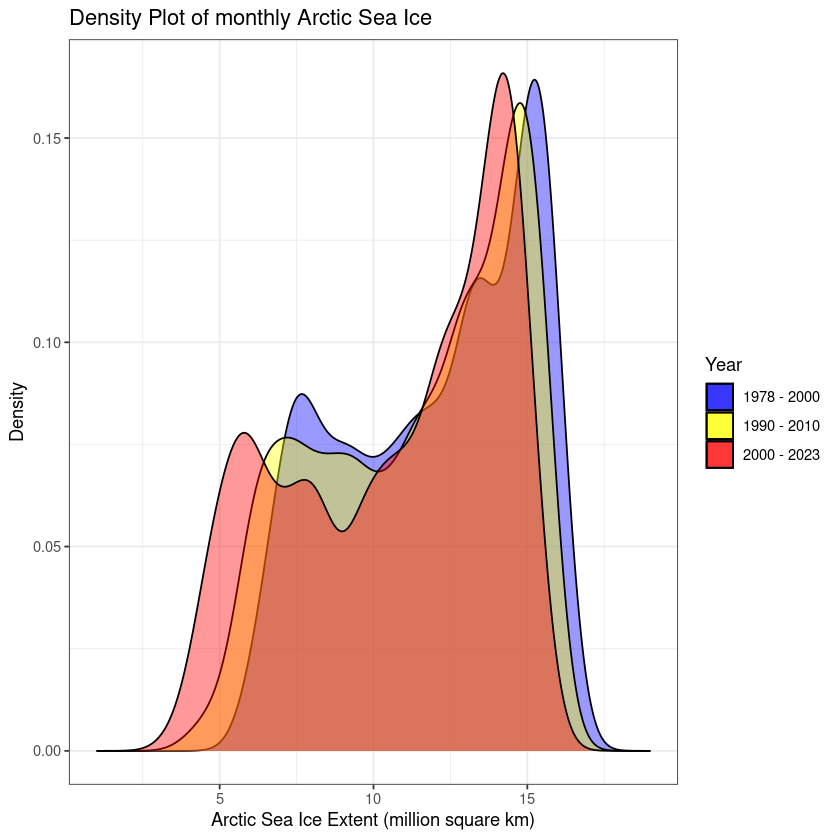

In [192]:
# Filter NH_monthly data from 1978 to 2000
NH_monthly_1978_2000 <- NH_monthly[NH_monthly$date < as.Date("2000-01-01"),]

# Filter NH_monthly data from 1990 to 2010
NH_monthly_1990_2010 <- NH_monthly[NH_monthly$date >= as.Date("1990-01-01") & NH_monthly$date < as.Date("2010-01-01"),]

# Filter NH_monthly data from 2000 to 2023
NH_monthly_2000_2023 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01"),]

# Create a new plot with three density plots
NH_density3groups <- ggplot() +
  geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of monthly Arctic Sea Ice") +
  scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
  guides(fill = guide_legend(title = "Year")) +
  xlim(1, 19) +
  theme_bw()

ggsave("NH_density3groups.png", plot = NH_density2groups, width = 10, height = 4)
print(NH_density3groups)

In [193]:
# # We ran this part and then saved the result on GitHub. After that, it commented it to save the CPU. 
# # You could uncomment and rerun the code when the source data is updated, This way, you will get the latest SST and Sea Ice data.

# # Save the three density plots as png images then combine them in one gif 

# ggsave(filename = "1978_to_2000.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "1990_to_2010.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "2000_to_2023.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())


# # Create a list of the three image filenames
# image_files <- c("1978_to_2000.png", "1990_to_2010.png", "2000_to_2023.png")

# # Combine the images into an animated gif
# gifski::gifski(image_files, gif_file = "NH_Monthly_gif_3_phases.gif")

Here is the animated gif for the periods 1978_to_2000, 1990_to_2010, and 2000_to_2023:

![animated gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/NH_Monthly_gif_3_phases.gif)

**Visually**, The declining trend is evident  in the density plot above between the two time periods (1978_to_2000,and 2000_to_2023). We need to test this declining numerically. We will test in the following code the hypothesis that the means of these three series are significantly equal.

In [194]:
# Perform t-test to compare means of NH_monthly_before_2000 and NH_monthly_after_2000
t_test_result <- t.test(NH_monthly_before_2000$extent_NH, NH_monthly_after_2000$extent_NH)

# Print the result
t_test_result


	Welch Two Sample t-test

data:  NH_monthly_before_2000$extent_NH and NH_monthly_after_2000$extent_NH
t = 4.473, df = 536.95, p-value = 9.421e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6900292 1.7707137
sample estimates:
mean of x mean of y 
 12.01451  10.78414 


From the t-test above between the two periods (before 2000 and after 2000), we conclude that:
* There is a statistically significant decline trend in the monthly Ice extent in the Arctic
* The chance that such decline is from data noise is  9.421e-06


The importance of finding the Sea Ice response to global warming is now more than evident after the last conclusion that the Arctic sea ice is declining **significantly**. To study ice-response to climatic change, we could investigate the seasonality of sea ice extent. Then, if the time helped, its relationship with the Sea Surface Temperature SST.  

![image](image.png)


Photo from the famous paper of (Steffen, et al., 2018) [paper link](https://www.pnas.org/doi/pdf/10.1073/pnas.1810141115)

Sea Ice responds directly to temperature fluctuations by building or melting Ice. The critical issue in Climate Change is the stability zone range of this response mechanism and the Hysteresis between the two paths of building or melting Sea Ice. The figure above explains the stability zone. Can the system completely shut off and alter the fluctuations pattern, or is it a temporary shift inside the range of the stability zone?   
In the following code, I will explore the seasonal cycles of building and melting Sea Ice and if there is a hysteresis.

In [195]:
# Here we made a 'decimal date' column which will help us in the next calculation

# Create a new column 'decimal date' in the NH_monthly dataframe
NH_monthly$decimal_date <- as.numeric(format(NH_monthly$date, "%Y")) + as.numeric(format(NH_monthly$date, "%j")) / 365

# View the updated NH_monthly dataframe
NH_monthly

year,date,extent_NH,z_value,decimal_date
<int>,<date>,<dbl>,"<dbl[,1]>",<dbl>
1978,1978-11-01,11.645,0.086051674,1978.836
1978,1978-12-01,13.667,0.705133620,1978.918
1979,1979-01-01,15.414,1.240017973,1979.003
1979,1979-02-01,16.175,1.473015679,1979.088
1979,1979-03-01,16.342,1.524146581,1979.164
1979,1979-04-01,15.447,1.250121684,1979.249
1979,1979-05-01,13.857,0.763306504,1979.332
1979,1979-06-01,12.530,0.357014840,1979.416
1979,1979-07-01,10.311,-0.322383201,1979.499


In [196]:
#       ❄️❄️❄️❄️❄️❄️❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄ Investigating Arctic Sea Ice Hysteresis ❄ ❄  ❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄️❄️❄️❄️❄️❄️


# method 1 that I tried but I will not use it anymore because the resultion is small
# We have now the 'decimal date'. 
# every year is a complete cycle of both (building cycle and melting ice cycle)
# So I need to plot on the x-axis both 6-months melting and 6-months freezing above each other
# If we take the sin of (2 pi times the date) we will get identical value for every month
# The next plot I will plot the ice extent on the y axis and the sin of (2 pi times the date) on the x axis
# we will get 12 clusters for the 12 months. 

To check the Hysteresis on higher temporal resolution further, I will import the **Daily** Arctic sea ice extent 1981-2010 climatology from NSIDC and plot it. [link](https://nsidc.org/arcticseaicenews/sea-ice-tools/)

In [197]:
# Set the URL for the Daily_sea_Ice data
Daily_sea_Ice_link <- "https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_climatology_1981-2010_v3.0.csv"

# Read the data from the URL, skipping the first row and selecting only the first two columns
Daily_sea_Ice <- read_csv(Daily_sea_Ice_link, skip = 2, col_names = c("Day_of_year", "Extent"), col_types = cols(Day_of_year = col_number()))[, 1:2]

Daily_sea_Ice

Day_of_year,Extent
<dbl>,<dbl>
1,13.778
2,13.842
3,13.891
4,13.930
5,13.978
6,14.028
7,14.091
8,14.132
9,14.170


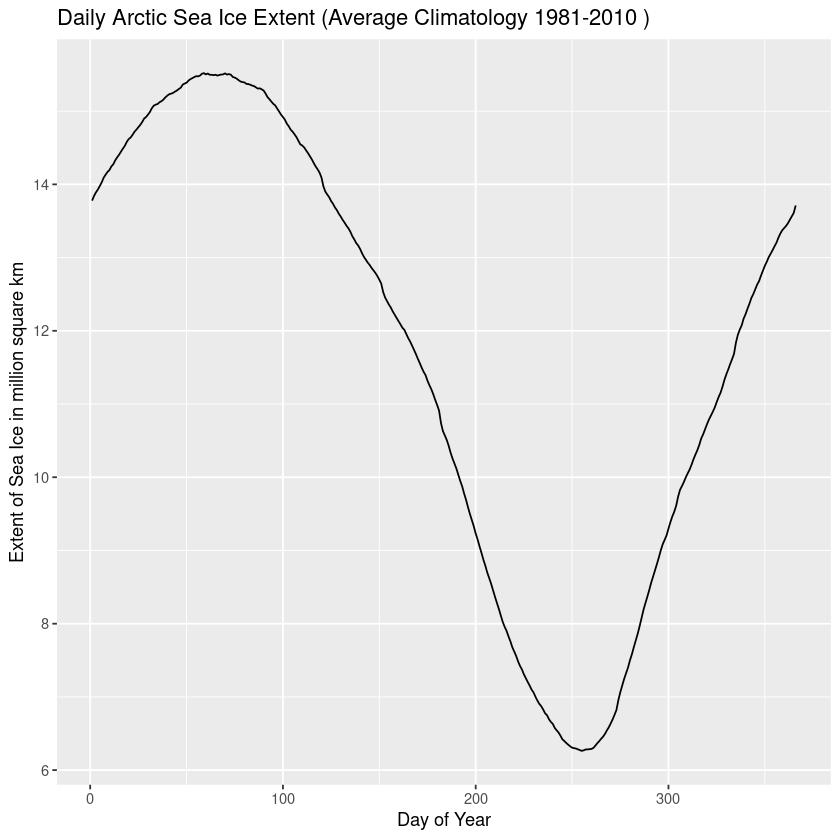

In [198]:
# Plotting the Daily_sea_Ice
ggplot(Daily_sea_Ice, aes(x = Day_of_year, y = Extent)) +
  geom_line() +
  labs(x = "Day of Year", y = "Extent of Sea Ice in million square km") +
  ggtitle("Daily Arctic Sea Ice Extent (Average Climatology 1981-2010 )")

In [199]:
# Find the day of the biggest extent
max_extent_day <- Daily_sea_Ice$Day_of_year[which.max(Daily_sea_Ice$Extent)]

# Find the day of the smallest extent
min_extent_day <- Daily_sea_Ice$Day_of_year[which.min(Daily_sea_Ice$Extent)]

max_extent_day
min_extent_day

[1] 59

[1] 255

In [200]:
# We will make two time series from Daily_sea_Ice; one for daily_melting_path and other for the daily_freezing_path
# Then we will plot them on the same scale of days to check the Hysteresis 

# Find the index of max_extent_day and min_extent_day
max_extent_index <- which(Daily_sea_Ice$Day_of_year == max_extent_day)
min_extent_index <- which(Daily_sea_Ice$Day_of_year == min_extent_day)

# Create the daily_melting_path from max_extent_index to min_extent_index
daily_melting_path <- Daily_sea_Ice$Extent[max_extent_index:min_extent_index]

# Create the daily_freezing_path as a combination of two lists
daily_freezing_path <- c(Daily_sea_Ice$Extent[min_extent_index:length(Daily_sea_Ice$Extent)], Daily_sea_Ice$Extent[1:max_extent_index])

# Add the 'days' column to daily_melting_path
daily_melting_path <- data.frame(days = 1:length(daily_melting_path), daily_melting_path)


# Add the 'days' column to daily_freezing_path
# The index of freezing path is shorter. we need to reverse its order to plot it on the same figure with the melting path
daily_freezing_path <- data.frame(days = (length(daily_freezing_path)):1, daily_freezing_path)
# So when will plot the daily_freezing_path, the time will go from right to left

# Print the updated daily_melting_path and daily_freezing_path
daily_melting_path
daily_freezing_path

days,daily_melting_path
<int>,<dbl>
1,15.519
2,15.502
3,15.514
4,15.497
5,15.496
6,15.492
7,15.497
8,15.486
9,15.494


days,daily_freezing_path
<int>,<dbl>
171,6.263
170,6.270
169,6.282
168,6.283
167,6.286
166,6.289
165,6.302
164,6.331
163,6.365


In [201]:
# Check the number of days in the freezing path
num_freezing_days <- nrow(daily_freezing_path)

# Check the number of days in the melting path
num_melting_days <- nrow(daily_melting_path)

# Print the number of days in the freezing and melting paths
paste("The freezing path has", num_freezing_days, "days.")
paste("The melting path has", num_melting_days, "days.")

[1] "The freezing path has 171 days."

[1] "The melting path has 197 days."

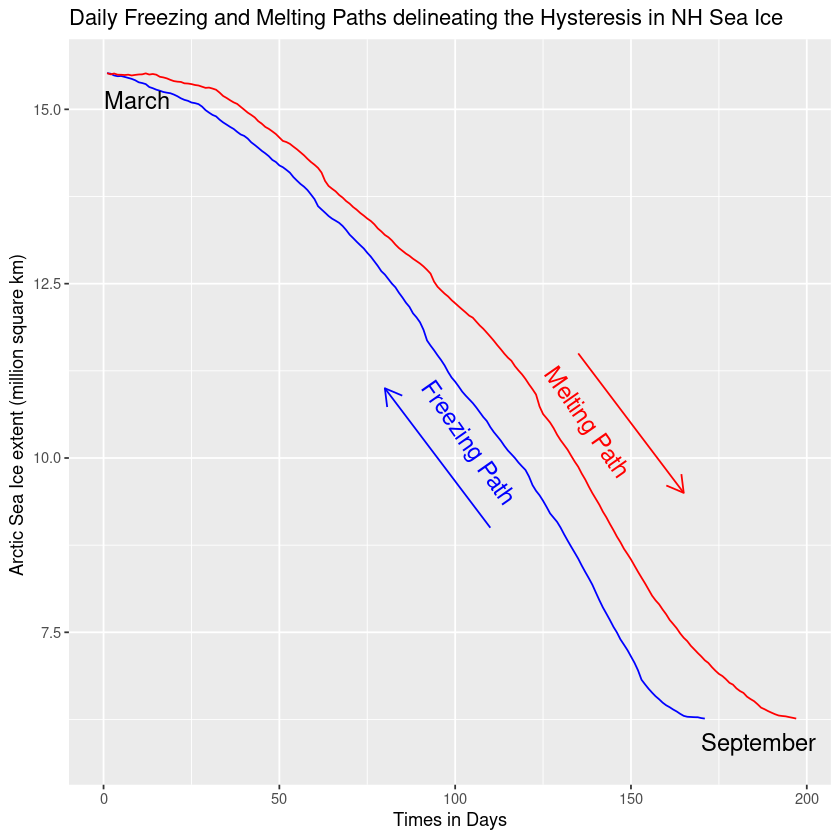

In [202]:
# Plot both daily_freezing_path and daily_melting_path on the same figure
ggplot() +
  geom_line(data = daily_freezing_path, aes(x = days, y = daily_freezing_path, color = "Freezing Path")) +
  geom_line(data = daily_melting_path, aes(x = days, y = daily_melting_path, color = "Melting Path")) +
  xlab("Times in Days") +
  ylab("Arctic Sea Ice extent (million square km) ") +
  ggtitle("Daily Freezing and Melting Paths delineating the Hysteresis in NH Sea Ice") +
  scale_color_manual(values = c("blue", "red"), labels = c("Freezing Path", "Melting Path")) +
  theme(legend.position = "topleft") +
  guides(color = guide_legend(title = "Path")) +
  annotate("text", x = 90, y = 11, label = "Freezing Path", color = "blue", angle = -55, size = 5, hjust = 0, vjust = 0) +
  annotate("segment", x = 110, xend = 80, y = 9, yend = 11, arrow = arrow(length = unit(0.4, "cm")), color = "blue") +
  annotate("text", x = 125, y = 11.2, label = "Melting Path", color = "red", angle = -55, size = 5, hjust = 0, vjust = 0) +
  annotate("segment", x = 135, xend = 165, y = 11.5, yend = 9.5, arrow = arrow(length = unit(0.4, "cm")), color = "red") +
  annotate("text", x = 0, y = 15, label = "March", color = "black", angle = 0, size = 5, hjust = 0, vjust = 0) + 
  annotate("text", x = 170, y = 5.8, label = "September", color = "black", angle = 0, size = 5, hjust = 0, vjust = 0)

The time goes clockwise in the figure above. There is a clear Hysteresis in Sea ice (formation and melting) as the figure above shows.  

Both melting and freezing begin fast then slow down due to the thermal inertia of both ice and water and the feedback effect. 

This high thermal capacity of ocean water is also the main reason for lagging the maximum ice extent till March instead of December in the Northern hemisphere.

We can check the speed of melting or freezing by taking the first derivative of the figures above 

In [203]:
# first we need revert the daily_freezing_path to let time go from left to right
daily_freezing_path$days <- 1:(length(daily_freezing_path$days))

In [204]:
# Calculate the first derivative of daily_melting_path
daily_melting_derivative <- diff(daily_melting_path$daily_melting_path)

# Create a new data frame for the first derivative of daily_melting_path
daily_melting_derivative_df <- data.frame(days = daily_melting_path$days[-1], daily_melting_derivative)

# Calculate the first derivative of daily_freezing_path
daily_freezing_derivative <- diff(daily_freezing_path$daily_freezing_path)

# Create a new data frame for the first derivative of daily_freezing_path
daily_freezing_derivative_df <- data.frame(days = daily_freezing_path$days[-1], daily_freezing_derivative)


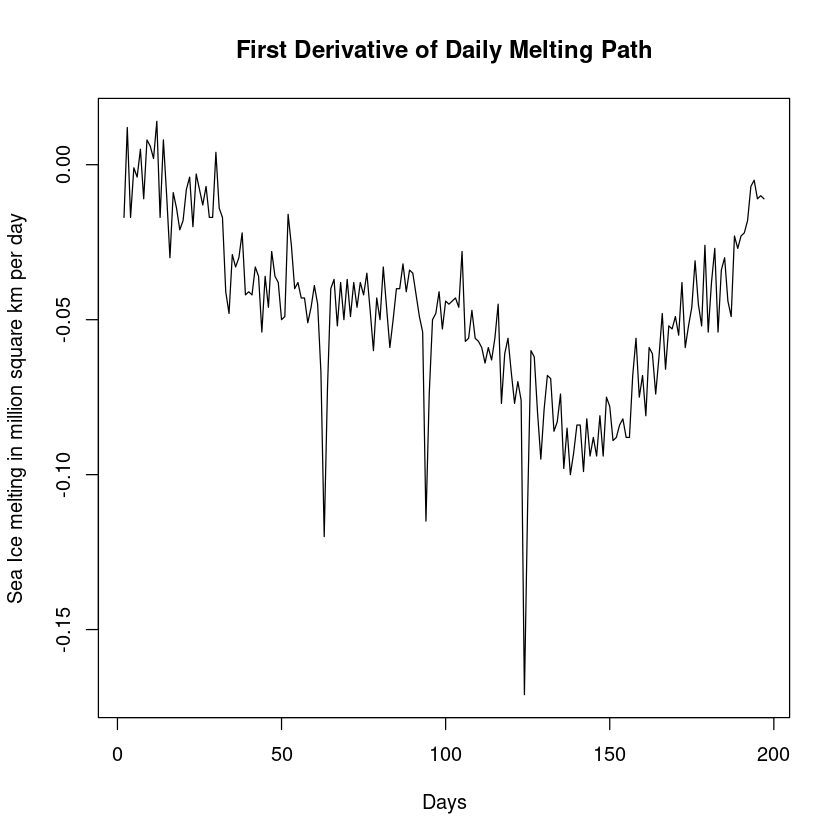

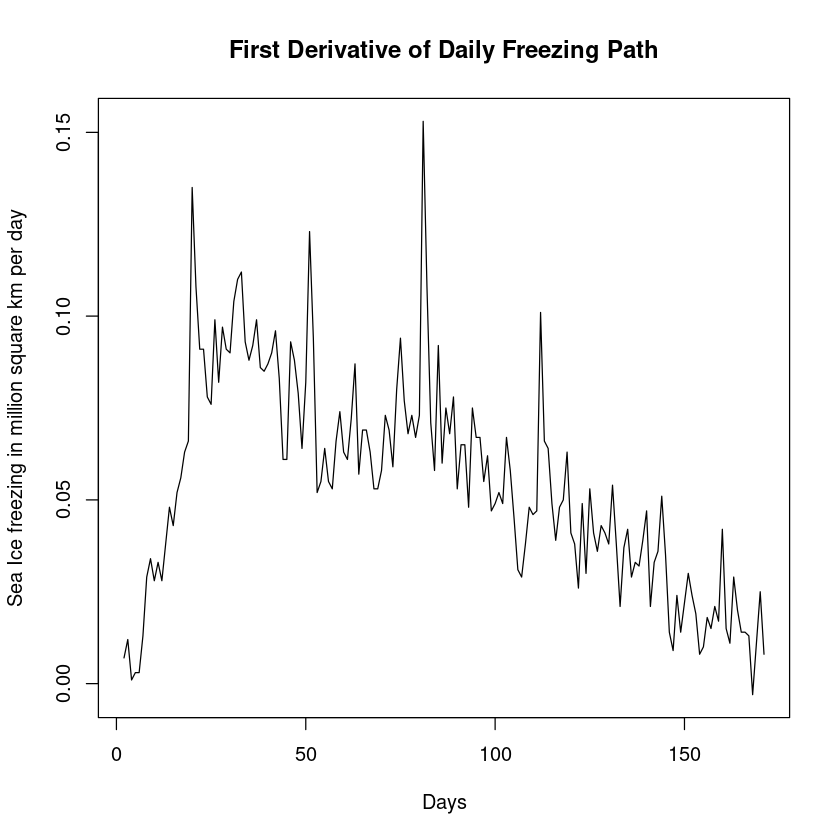

In [205]:
# plot in two different plots

# Plot the first derivative of daily_melting_path
plot(daily_melting_derivative_df$days, daily_melting_derivative_df$daily_melting_derivative, type = "l", xlab = "Days", ylab = "Sea Ice melting in million square km per day", main = "First Derivative of Daily Melting Path")

# Plot the first derivative of daily_freezing_path
plot(daily_freezing_derivative_df$days, daily_freezing_derivative_df$daily_freezing_derivative, type = "l", xlab = "Days", ylab = "Sea Ice freezing in million square km per day", main = "First Derivative of Daily Freezing Path")

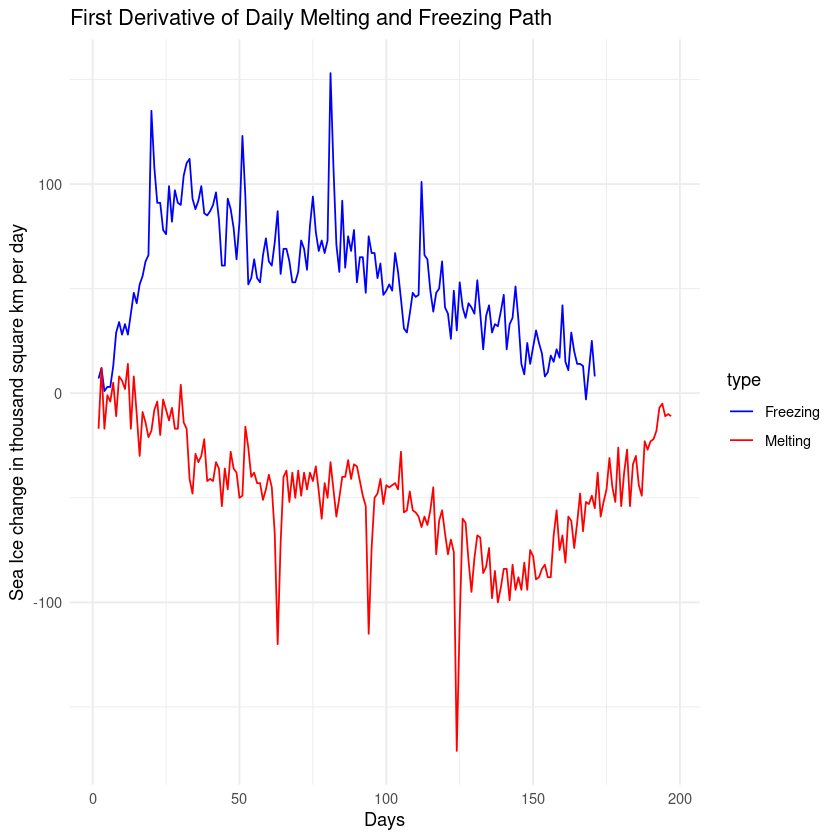

In [206]:
# ploting both on the same figure and change the unit to thousand square

# Combine the data frames for daily_melting_derivative and daily_freezing_derivative
combined_df <- data.frame(
  days = c(daily_melting_derivative_df$days, daily_freezing_derivative_df$days),
  derivative = c(daily_melting_derivative_df$daily_melting_derivative, daily_freezing_derivative_df$daily_freezing_derivative),
  type = c(rep("Melting", length(daily_melting_derivative_df$days)), rep("Freezing", length(daily_freezing_derivative_df$days)))
)

# Multiply the values on the y-axis by 1000 to convert the unit to thousand square km
combined_df$derivative <- combined_df$derivative * 1000


# Plot the combined data using ggplot with the updated y-axis unit and color mapping
ggplot(combined_df, aes(x = days, y = derivative, color = type)) +
  geom_line() +
  labs(x = "Days", y = "Sea Ice change in thousand square km per day", title = "First Derivative of Daily Melting and Freezing Path") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

As we hypothesis before, Both melting and freezing begin fast then slow down due to the thermal inertia of both ice and water and the feedback effect.   

Even though this is an average of thirty years, it still has high variation. We could make a new plot with the rolling moving average to reduce the noise more and reveal the system pattern.

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


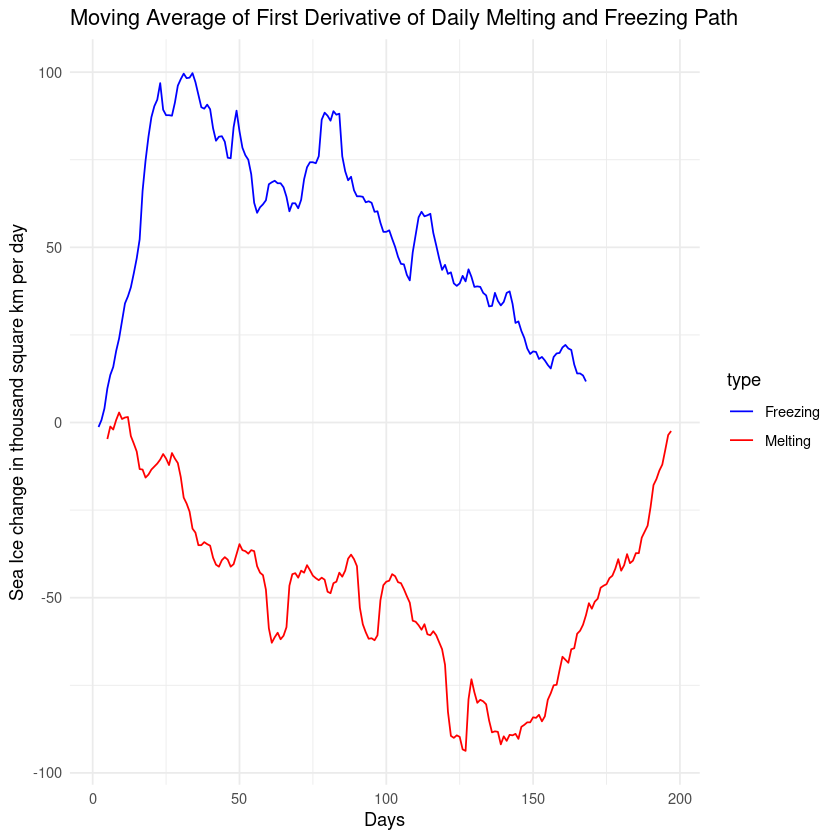

In [207]:
# Take a moving rolling average of 7 days of combined_df
combined_df$moving_average <- zoo::rollmean(combined_df$derivative, k = 7, fill = NA)

# Plot the moving average with color mapping
ggplot(combined_df, aes(x = days, y = moving_average, color = type)) +
  geom_line() +
  labs(x = "Days", y = "Sea Ice change in thousand square km per day", title = "Moving Average of First Derivative of Daily Melting and Freezing Path") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

The pattern above shows an almost straight line at the end of the melting cycle and the beginning of the freezing cycle. This period in the northern hemisphere (Aug, Sep, Oct) has almost no variation. **Why**?

We saw that the freezing path takes a shorter time on average. Let us investigate that more for every year and the trend.

In [208]:
# In this code, we will import an Ice data series with higher daily resolution but not the average as we did in the last code
# our goal is to check if the melting_path time increases in days. 


In [209]:
# working on.............................

In [210]:
#  ❄️❄️❄️❄️❄️❄️             Comparing every month separately             ❄️❄️❄️❄️❄️❄️

Because of the high seasonality, we could compare every month separately in the time series to find the long trend. So, we will split our time series into 12 series and check the trend of every month's series in terms of average change (total ice loss). Comparing the long trend of only one month will also help us to lessen the Climatological Cycle variation.

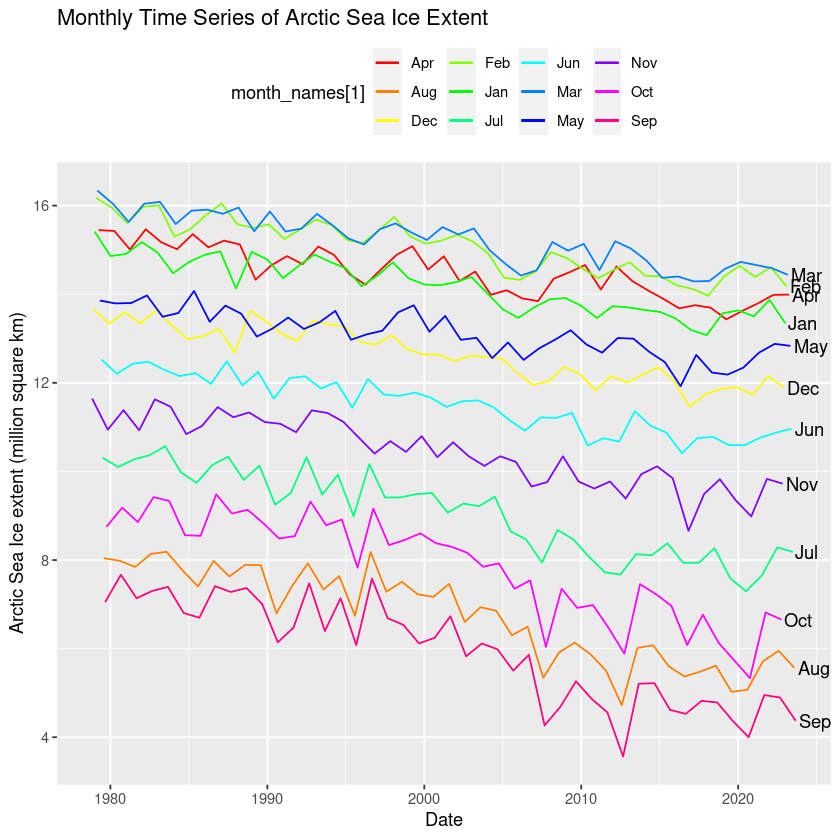

In [211]:
# Split the NH_monthly data into 12 series based on month
monthly_series <- split(NH_monthly, format(NH_monthly$date, "%b"))

# Create a vector of month names
month_names <- names(monthly_series)#  Beware, the list ordered alphabetically. it is not month order
# If you print it out you will see the alphabetical order
# 'Apr''Aug''Dec''Feb''Jan''Jul''Jun''Mar''May''Nov''Oct''Sep'
# So the monthly_series[[1]]  is April


# Plot the 12 time series on the same figure
ggplot() +
  geom_line(data = monthly_series[[1]], aes(x = date, y = extent_NH, color = month_names[1])) +
  geom_line(data = monthly_series[[2]], aes(x = date, y = extent_NH, color = month_names[2])) +
  geom_line(data = monthly_series[[3]], aes(x = date, y = extent_NH, color = month_names[3])) +
  geom_line(data = monthly_series[[4]], aes(x = date, y = extent_NH, color = month_names[4])) +
  geom_line(data = monthly_series[[5]], aes(x = date, y = extent_NH, color = month_names[5])) +
  geom_line(data = monthly_series[[6]], aes(x = date, y = extent_NH, color = month_names[6])) +
  geom_line(data = monthly_series[[7]], aes(x = date, y = extent_NH, color = month_names[7])) +
  geom_line(data = monthly_series[[8]], aes(x = date, y = extent_NH, color = month_names[8])) +
  geom_line(data = monthly_series[[9]], aes(x = date, y = extent_NH, color = month_names[9])) +
  geom_line(data = monthly_series[[10]], aes(x = date, y = extent_NH, color = month_names[10])) +
  geom_line(data = monthly_series[[11]], aes(x = date, y = extent_NH, color = month_names[11])) +
  geom_line(data = monthly_series[[12]], aes(x = date, y = extent_NH, color = month_names[12])) +
  geom_text(data = monthly_series[[1]][nrow(monthly_series[[1]]) , ], aes(x = date, y = extent_NH, label = month_names[1]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[2]][nrow(monthly_series[[2]]) , ], aes(x = date, y = extent_NH, label = month_names[2]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[3]][nrow(monthly_series[[3]]) , ], aes(x = date, y = extent_NH, label = month_names[3]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[4]][nrow(monthly_series[[4]]) , ], aes(x = date, y = extent_NH, label = month_names[4]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[5]][nrow(monthly_series[[5]]) , ], aes(x = date, y = extent_NH, label = month_names[5]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[6]][nrow(monthly_series[[6]]) , ], aes(x = date, y = extent_NH, label = month_names[6]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[7]][nrow(monthly_series[[7]]) , ], aes(x = date, y = extent_NH, label = month_names[7]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[8]][nrow(monthly_series[[8]]) , ], aes(x = date, y = extent_NH, label = month_names[8]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[9]][nrow(monthly_series[[9]]) , ], aes(x = date, y = extent_NH, label = month_names[9]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[10]][nrow(monthly_series[[10]]) , ], aes(x = date, y = extent_NH, label = month_names[10]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[11]][nrow(monthly_series[[11]]) , ], aes(x = date, y = extent_NH, label = month_names[11]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[12]][nrow(monthly_series[[12]]) , ], aes(x = date, y = extent_NH, label = month_names[12]), hjust = -0.1, vjust = 0.5, color = "black") +
  xlab("Date") +
  ylab("Arctic Sea Ice extent (million square km)") +
  ggtitle("Monthly Time Series of Arctic Sea Ice Extent") +
  scale_color_manual(values = rainbow(12), labels = month_names) +
  theme(legend.position = "top")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


R-squared value for Apr is 0.75 
R-squared value for Aug is 0.82 
R-squared value for Dec is 0.85 
R-squared value for Feb is 0.83 
R-squared value for Jan is 0.83 
R-squared value for Jul is 0.85 
R-squared value for Jun is 0.87 
R-squared value for Mar is 0.81 
R-squared value for May is 0.69 
R-squared value for Nov is 0.81 
R-squared value for Oct is 0.79 
R-squared value for Sep is 0.8 
[1] "The decreasing trend of Arctic Sea ICE Extent in Apr is -0.371 million square km per decade."
[1] "The decreasing trend of Arctic Sea ICE Extent in Aug is -0.714 million square km per decade."
[1] "The decreasing trend of Arctic Sea ICE Extent in Dec is -0.434 million square km per decade."
[1] "The decreasing trend of Arctic Sea ICE Extent in Feb is -0.423 million square km per decade."
[1] "The decreasing trend of Arctic Sea ICE Extent in Jan is -0.415 million square km per decade."
[1] "The decreasing trend of Arctic Sea ICE Extent in Jul is -0.665 million square km per decade."
[1] "The de

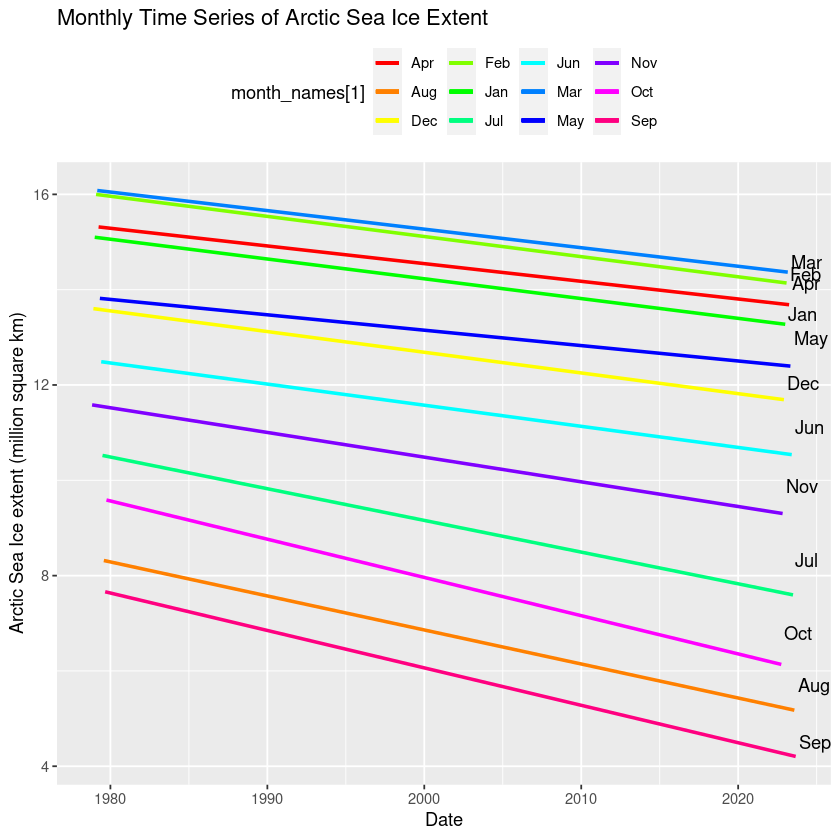

In [212]:
# Split the NH_monthly data into 12 series based on month
monthly_series <- split(NH_monthly, format(NH_monthly$date, "%b"))

# Create a vector of month names
month_names <- names(monthly_series)

# Plot the linear trend line for each month
ggplot() +
  geom_smooth(data = monthly_series[[1]], aes(x = date, y = extent_NH, color = month_names[1]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[2]], aes(x = date, y = extent_NH, color = month_names[2]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[3]], aes(x = date, y = extent_NH, color = month_names[3]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[4]], aes(x = date, y = extent_NH, color = month_names[4]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[5]], aes(x = date, y = extent_NH, color = month_names[5]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[6]], aes(x = date, y = extent_NH, color = month_names[6]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[7]], aes(x = date, y = extent_NH, color = month_names[7]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[8]], aes(x = date, y = extent_NH, color = month_names[8]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[9]], aes(x = date, y = extent_NH, color = month_names[9]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[10]], aes(x = date, y = extent_NH, color = month_names[10]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[11]], aes(x = date, y = extent_NH, color = month_names[11]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[12]], aes(x = date, y = extent_NH, color = month_names[12]), method = "lm", se = FALSE) +
  geom_text(data = monthly_series[[1]][nrow(monthly_series[[1]]) , ], aes(x = date, y = extent_NH, label = month_names[1]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[2]][nrow(monthly_series[[2]]) , ], aes(x = date, y = extent_NH, label = month_names[2]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[3]][nrow(monthly_series[[3]]) , ], aes(x = date, y = extent_NH, label = month_names[3]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[4]][nrow(monthly_series[[4]]) , ], aes(x = date, y = extent_NH, label = month_names[4]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[5]][nrow(monthly_series[[5]]) , ], aes(x = date, y = extent_NH, label = month_names[5]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[6]][nrow(monthly_series[[6]]) , ], aes(x = date, y = extent_NH, label = month_names[6]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[7]][nrow(monthly_series[[7]]) , ], aes(x = date, y = extent_NH, label = month_names[7]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[8]][nrow(monthly_series[[8]]) , ], aes(x = date, y = extent_NH, label = month_names[8]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[9]][nrow(monthly_series[[9]]) , ], aes(x = date, y = extent_NH, label = month_names[9]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[10]][nrow(monthly_series[[10]]) , ], aes(x = date, y = extent_NH, label = month_names[10]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[11]][nrow(monthly_series[[11]]) , ], aes(x = date, y = extent_NH, label = month_names[11]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[12]][nrow(monthly_series[[12]]) , ], aes(x = date, y = extent_NH, label = month_names[12]), hjust = -0.1, vjust = 0, color = "black") +
  xlab("Date") +
  ylab("Arctic Sea Ice extent (million square km)") +
  ggtitle("Monthly Time Series of Arctic Sea Ice Extent") +
  scale_color_manual(values = rainbow(12), labels = month_names) +
  theme(legend.position = "top")

# Calculate and store the slope of each trend line
# print out R value of the linear regression
slope_values <- numeric(12)
for (i in 1:12) {
  trend_line <- lm(extent_NH ~ year, data = monthly_series[[i]])
  slope_values[i] <- coef(trend_line)[2]
  cat(paste("R-squared value for", month_names[i], "is", round(summary(trend_line)$r.squared,2), "\n"))
}

# Calculate the decreasing trend in million square km per decade from the slope value
# Then print out the calculation
NH_decreasing <- (slope_values * 10)
for (i in 1:12) {
  print(paste("The decreasing trend of Arctic Sea ICE Extent in", month_names[i], "is", round(NH_decreasing[i],3), "million square km per decade."))
}

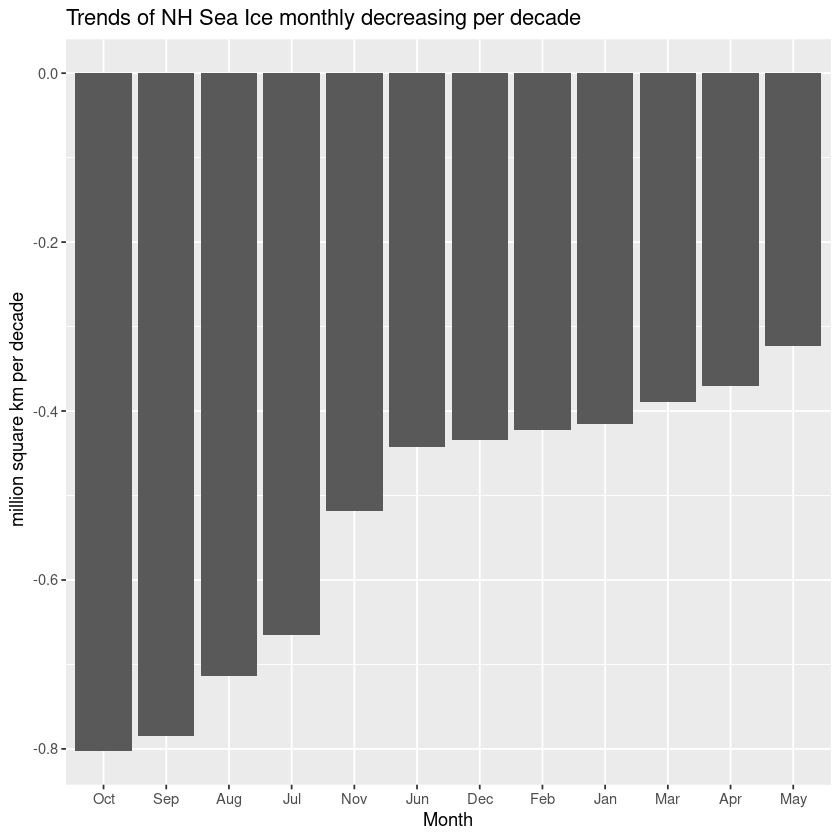

In [213]:
# Create a dataframe for the Trends of NH Sea Ice monthly decreasing per decade
# This dataframe contain month_names and NH_decreasing from the code above
NH_Monthly_trend <- data.frame(month_names = month_names, NH_decreasing = NH_decreasing)

# Order the df dataframe in ascending order based on NH_decreasing
NH_Monthly_trend <- NH_Monthly_trend[order(NH_Monthly_trend$NH_decreasing), ]

# Create a factor variable for month_names in the desired order
NH_Monthly_trend$month_names <- factor(NH_Monthly_trend$month_names, levels = NH_Monthly_trend$month_names)

ggplot(NH_Monthly_trend, aes(x = month_names, y = NH_decreasing)) +
  geom_col() +
  labs(x = "Month", y =" million square km per decade") +
  ggtitle("Trends of NH Sea Ice monthly decreasing per decade")

From the figure above, we can observe a trend of losing Sea Ice in all months. Nevertheless, the months after the northern hemisphere summer (Oct, Sep, and Aug) lost ice at a rate almost two times more than the months after the Northern hemisphere winter (May, Apr, Mar).  
The temperature variations in winter are, in general, lower than freezing. The critical time for ice melting is in summer. This makes the summer Sea Ice more sensitive to global warming and could explain the faster melting trend in these months after summer.  



From our conclusion above, We hypothesize that the seasonal Sea Ice fluctuation trend is increasing, which can impact the climate and increase the inertia in the system; in the following code, we will try to quantify this cyclicity increase. We will investigate the total amount that freezes or melts per year and investigate if this amount is increasing as we hypothesize above or not.

In [214]:
# Calculate the annual maximum value of NH_monthly$extent_NH
NH_annual_max <- aggregate(NH_monthly$extent_NH, by = list(year = format(NH_monthly$date, "%Y")), FUN = max)

# Calculate the annual minimum value of NH_monthly$extent_NH
NH_annual_min <- aggregate(NH_monthly$extent_NH, by = list(year = format(NH_monthly$date, "%Y")), FUN = min)

# Calculate the total seasonal fluctuation in a year
NH_annual_fluctuation <- NH_annual_max$x - NH_annual_min$x

# Convert annual_fluctuation to an array
NH_annual_fluctuation <- as.array(NH_annual_fluctuation)

# Remove the first and last value from annual_fluctuation because there is no enough maesurments in these years
NH_annual_fluctuation <- NH_annual_fluctuation[-c(1, length(NH_annual_fluctuation))]

# Create a data frame with 'year' column from 1979 to 2022
NH_annual_fluctuation <- data.frame(year = 1979:2022, fluctuation = NH_annual_fluctuation)

There is a trend of increasing the annual area of sea that melt and freez by 0.4 million square km per decade 
R value: 0.44 

 
 
Total trend of the annual increasing area of sea that melt and freeze by 1.7 million square km in the time between 1979 and 2022. 
This is an area 41 times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year. 
Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system. 
Suppose that the ice is just one meter thick. 
That will means 519099 millions joules extra added AND removed from the system every year. 
Extra energy added and removed to the system annually in Hiroshima bomb equivalents 35 Hiroshima bombs 


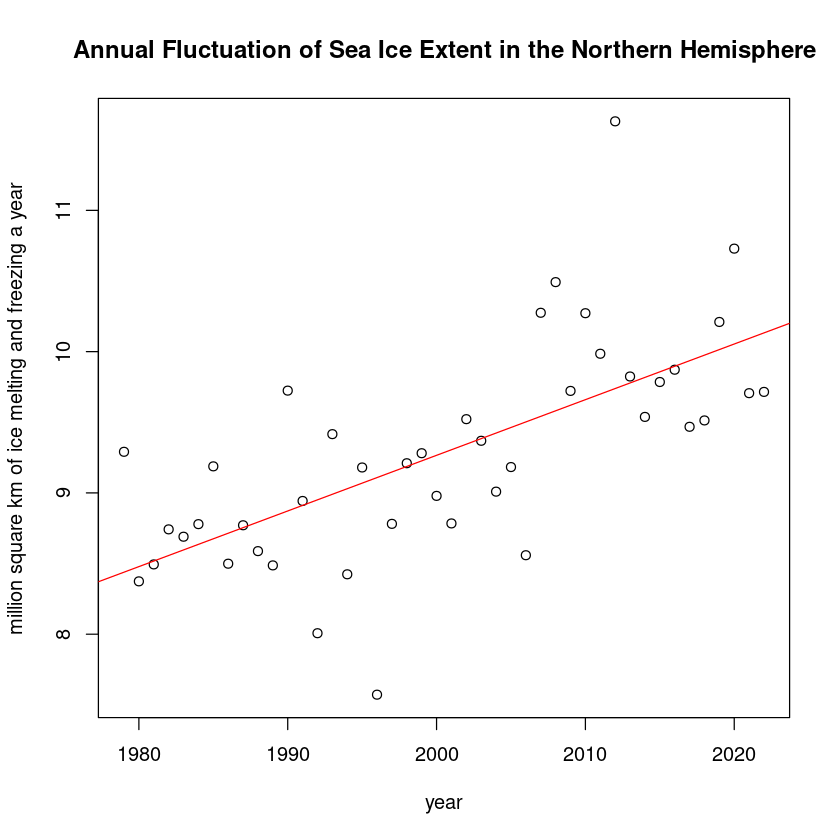

In [215]:
# plot NH_annual_fluctuation
plot(NH_annual_fluctuation, main = "Annual Fluctuation of Sea Ice Extent in the Northern Hemisphere",
     ylab = "million square km of ice melting and freezing a year")

# Add a trend line
trend_line <- lm(fluctuation ~ year, data = NH_annual_fluctuation)
abline(trend_line, col = "red")

# Plot the equation on the plot
equation <- paste0("y = ", round(trend_line$coefficients[1], 2), " + ", round(trend_line$coefficients[2], 2), "x")
text(1980, 2, equation, pos = 4)

# Print the slope of the line
# Which is the annual increase in Sea Ice melting and freezing a year
# let us considerthe trend for a decade
slope <- round(trend_line$coefficients[2], 2)
cat("There is a trend of increasing the annual area of sea that melt and freez by", slope*10,"million square km per decade", "\n")

# Print the R value
r_value <- round(summary(trend_line)$r.squared, 2)
cat("R value:", r_value, "\n")


cat("\n", "\n", "\n")

# Finiding the total increase in the annual Sea Ice Fluctuation

# Finding the value of the year 1979 and 2022 in the regression model of trend_line
value_1979 <- trend_line$coefficients[1] + trend_line$coefficients[2] * 1979
value_2022 <- trend_line$coefficients[1] + trend_line$coefficients[2] * 2022
Total_NH_fluctuation_increase  <-  value_2022 - value_1979
cat("Total trend of the annual increasing area of sea that melt and freeze by", round(Total_NH_fluctuation_increase,1),"million square km in the time between 1979 and 2022.", "\n")
cat("This is an area",round(Total_NH_fluctuation_increase/0.041),"times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year.", "\n")
cat("Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system.", "\n")
cat("Suppose that the ice is just one meter thick.", "\n")
cat("That will means",round(306478 * Total_NH_fluctuation_increase),"millions joules extra added AND removed from the system every year.", "\n")
# Energy of Hiroshima bomb ≈ 
cat("Extra energy added and removed to the system annually in Hiroshima bomb equivalents", round((306478 * Total_NH_fluctuation_increase)/15000,0),"Hiroshima bombs", "\n")


The R value of the regression model is 0.44. We need to consider testing if this fit is the best fit or not. Let us try an exponential fit

R value: 0.45 

 
 
Total trend of the annual increasing area of sea that melt and freeze by 1.7 million square km in the time between 1979 and 2022. 
This is an area 41 times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year. 
Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system. 
Suppose that the ice is just one meter thick. 
That will means 519099 millions joules extra added AND removed from the system every year. 
Extra energy added and removed to the system annually in Hiroshima bomb equivalents 35 Hiroshima bombs 


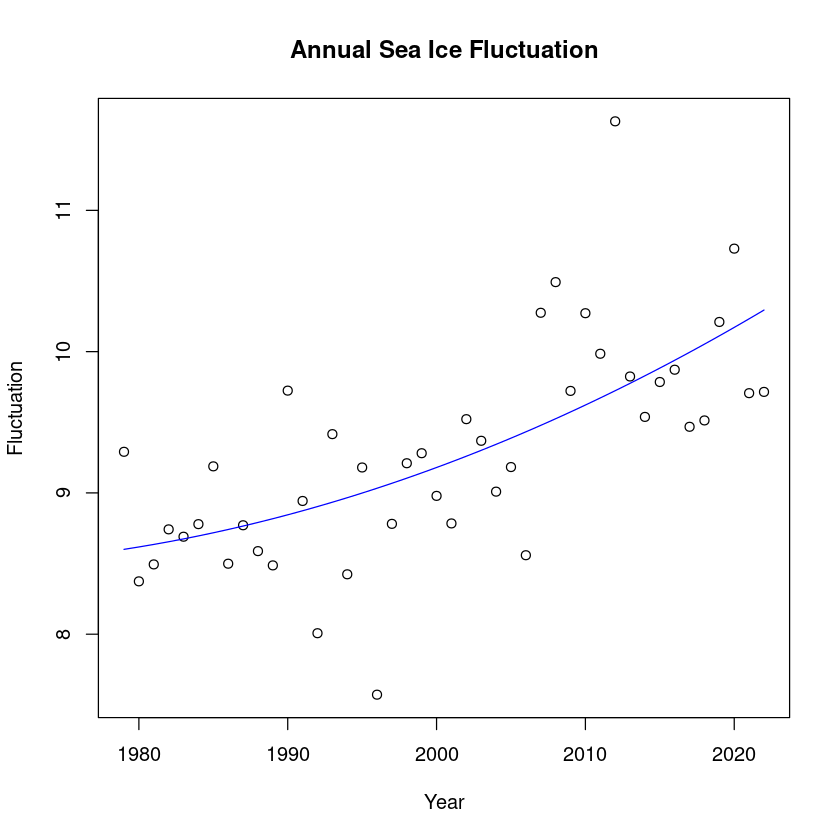

In [216]:
# Fit an exponential regression model
exp_model <- lm(fluctuation ~ year + I(year^2), data = NH_annual_fluctuation)
plot(NH_annual_fluctuation$year, NH_annual_fluctuation$fluctuation, xlab = "Year", ylab = "Fluctuation", main = "Annual Sea Ice Fluctuation")
lines(NH_annual_fluctuation$year, predict(exp_model), col = "blue")

# Plot the equation on the plot
equation <- paste0("y = ", round(exp_model$coefficients[1], 2), " + ", round(exp_model$coefficients[2], 2), "x + ", round(exp_model$coefficients[3], 2), "x^2")
text(1980, 2, equation, pos = 4)

# Print the R value
r_value <- round(summary(exp_model)$r.squared, 2)
cat("R value:", r_value, "\n")

cat("\n", "\n", "\n")

# Finding the total increase in the annual Sea Ice Fluctuation

# Finding the value of the year 1979 and 2022 in the exponential regression model
value_1979 <- predict(exp_model)[1]
value_2022 <- predict(exp_model)[44]
Total_NH_fluctuation_increase <- value_2022 - value_1979
cat("Total trend of the annual increasing area of sea that melt and freeze by", round(Total_NH_fluctuation_increase, 1), "million square km in the time between 1979 and 2022.", "\n")
cat("This is an area", round(Total_NH_fluctuation_increase / 0.041), "times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year.", "\n")
cat("Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system.", "\n")
cat("Suppose that the ice is just one meter thick.", "\n")
cat("That will means", round(306478 * Total_NH_fluctuation_increase), "millions joules extra added AND removed from the system every year.", "\n")
# Energy of Hiroshima bomb ≈ 15000 millions joules
cat("Extra energy added and removed to the system annually in Hiroshima bomb equivalents", round((306478 * Total_NH_fluctuation_increase) / 15000, 0), "Hiroshima bombs", "\n")

The difference between the linear and the exponential regression model in R-value was slightly small but visually looks better. We could investigate that statistically

The total energy change in the system due to the extra area of freezing and melting is significant, as we saw, but still, the energy balance change due to the albedo change is even bigger. [Kashiwase](https://www.nature.com/articles/s41598-017-08467-z) et al, 2017 concluded that the Albedo effect positive feedback could explain the drastic ice reduction in the Arctic Ocean.    
 
We conclude that we as human changed the Earth system successfully


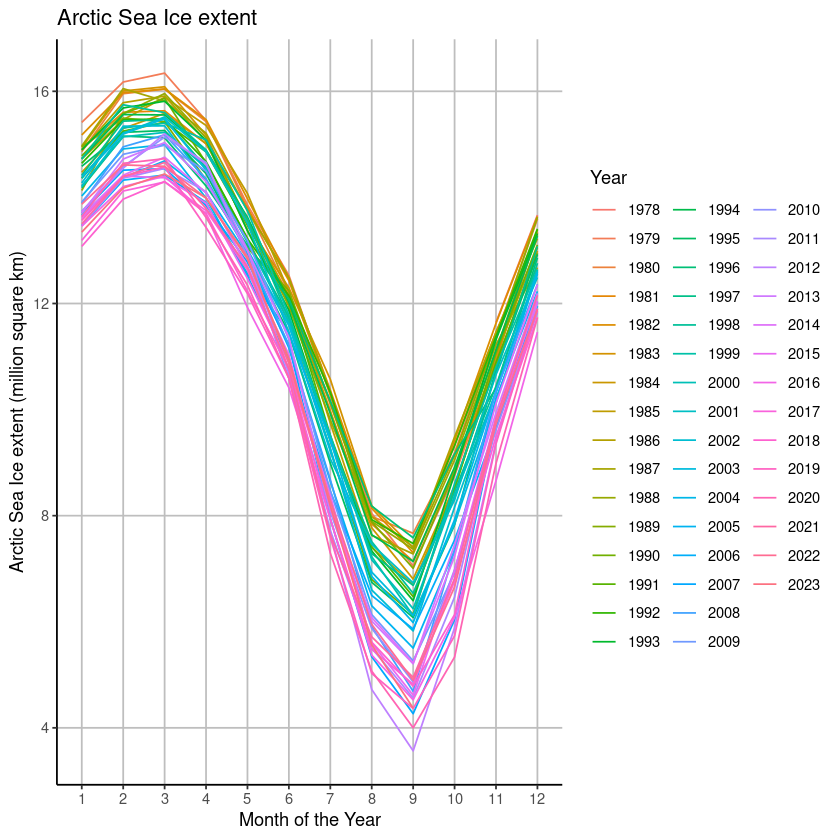

In [217]:
# Create a plot for the ice extent
plot <- ggplot(NH_monthly, aes(x = factor(month(date)), y = extent_NH, group = year)) +
  geom_line(aes(color = factor(year))) +
  labs(x = "Month of the Year", y = "Arctic Sea Ice extent (million square km)", title = "Arctic Sea Ice extent") +
  scale_color_discrete(name = "Year") +
  theme_classic() +
  theme(panel.grid.major = element_line(color = "gray"))

# Display the plot
print(plot)


It is also readable from the figure above that the loss in (after summer) sea ice is bigger than the loss in (after winter) sea ice.  
The lag between the coldest days and maximal Ice extent is clear. The same lag applied between the hottest day and the lowest extent.

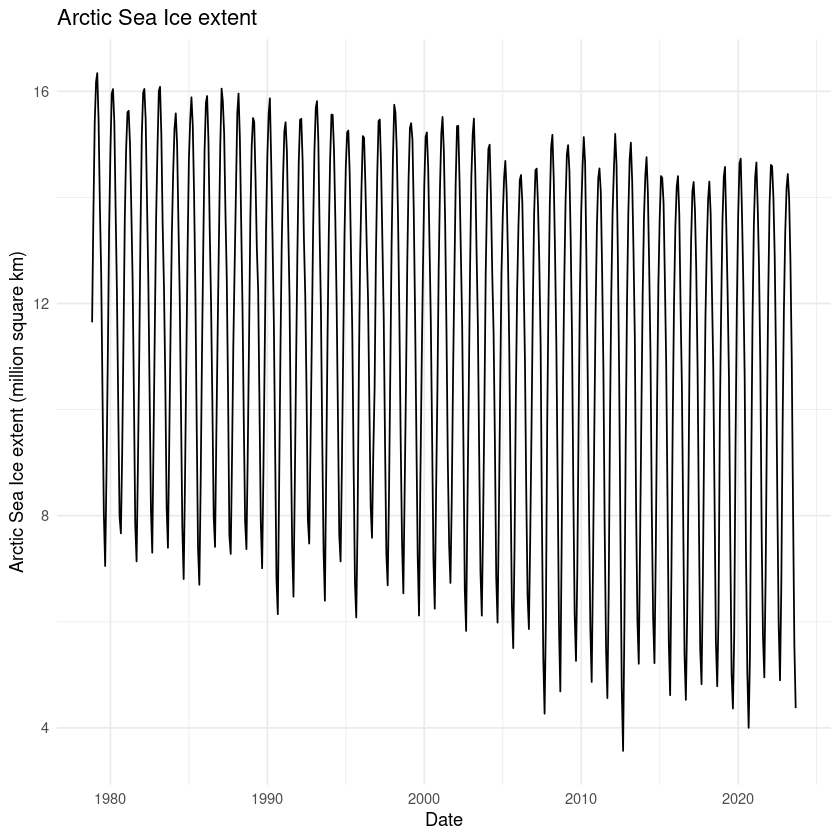

In [218]:
# Create a plot for the ice extent
ggplot(NH_monthly, aes(x = date, y = extent_NH)) +
  geom_line() +
  labs(x = "Date", y = "Arctic Sea Ice extent (million square km)", title = "Arctic Sea Ice extent") + 
  theme_minimal()


### Annual North Hemisphere sea ice ``NH_annual``

In [219]:
# Calculate the annual average value based on NH_monthly
NH_annual <- aggregate(extent_NH ~ year, data = NH_monthly, FUN = mean)

# Convert the year column to date format
NH_annual$year <- as.Date(paste0(NH_annual$year, "-06-1"))

# Remove the first and last year from NH_annual because there are no enough measurments in 1978, and 2023 yet
NH_annual <- NH_annual[-c(1, nrow(NH_annual)), ]

NH_annual

,year,extent_NH
,<date>,<dbl>
2,1979-06-01,12.34958
3,1980-06-01,12.34958
4,1981-06-01,12.14725
5,1982-06-01,12.46733
6,1983-06-01,12.35308
7,1984-06-01,11.92042
8,1985-06-01,12.01592
9,1986-06-01,12.22450
10,1987-06-01,12.20550


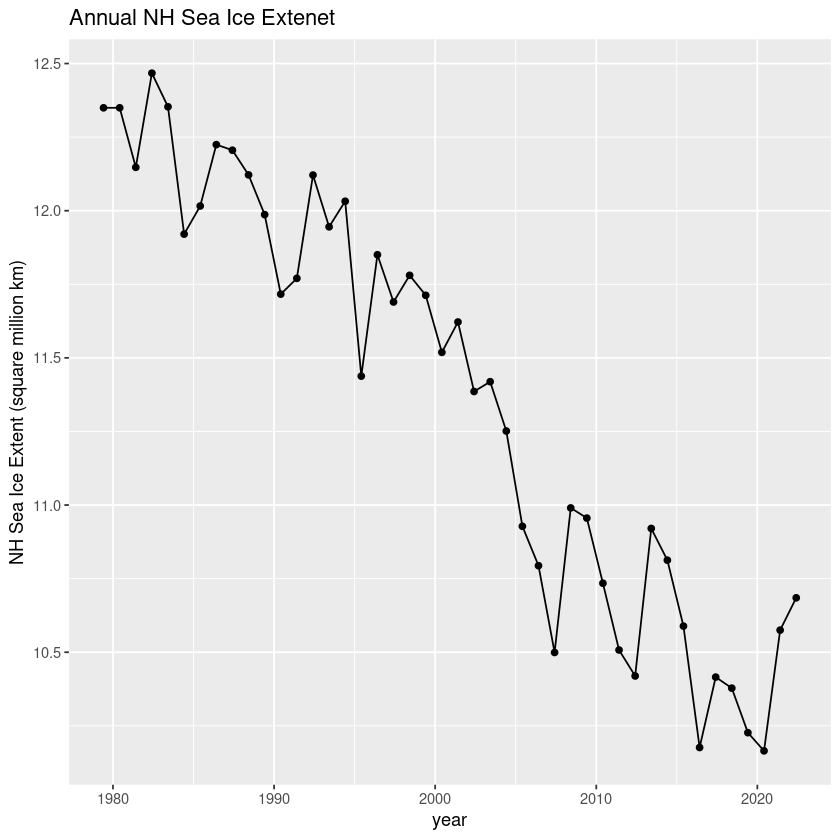

In [220]:
ggplot(NH_annual, aes(x = year, y = extent_NH)) +
  geom_line() +
  geom_point() +
  labs(y = "NH Sea Ice Extent (square million km)", title="Annual NH Sea Ice Extenet")

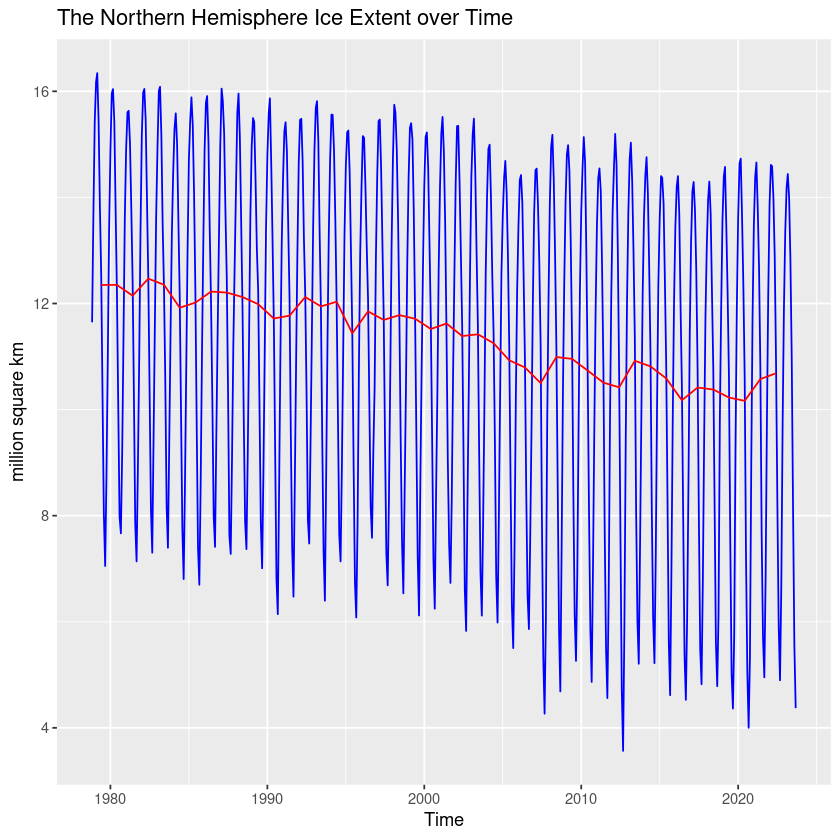

In [221]:
ggplot() +
  geom_line(data = NH_monthly, aes(x = date, y = extent_NH), color = "blue") +
  geom_line(data = NH_annual, aes(x = year, y = extent_NH), color = "red") +
  xlab("Time") +
  ylab("million square km") +
  labs(title = "The Northern Hemisphere Ice Extent over Time")


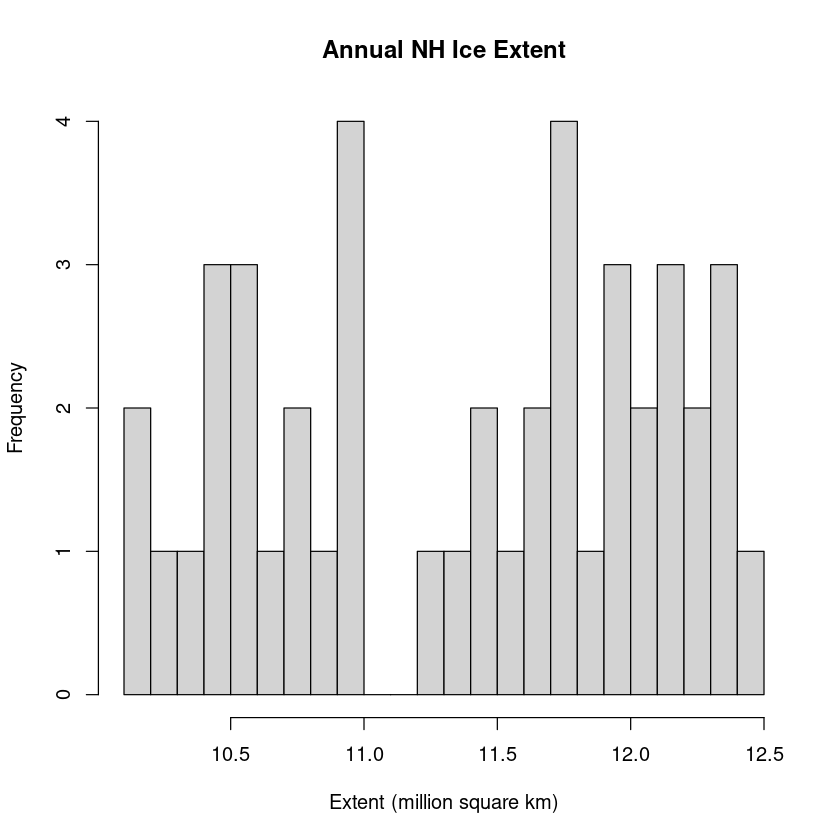

In [222]:
# Make a histogram of the data in NH annual
hist(NH_annual$extent_NH, main = "Annual NH Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 20)

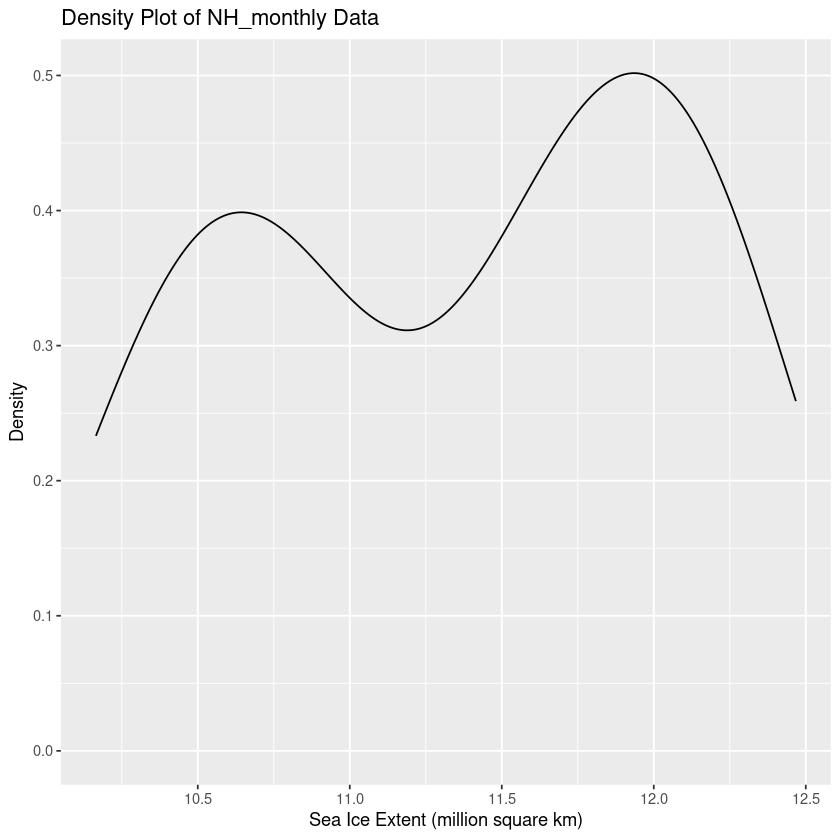

In [223]:
ggplot(data = NH_annual, aes(x = extent_NH)) +
  geom_density() +
  xlab("Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Data")

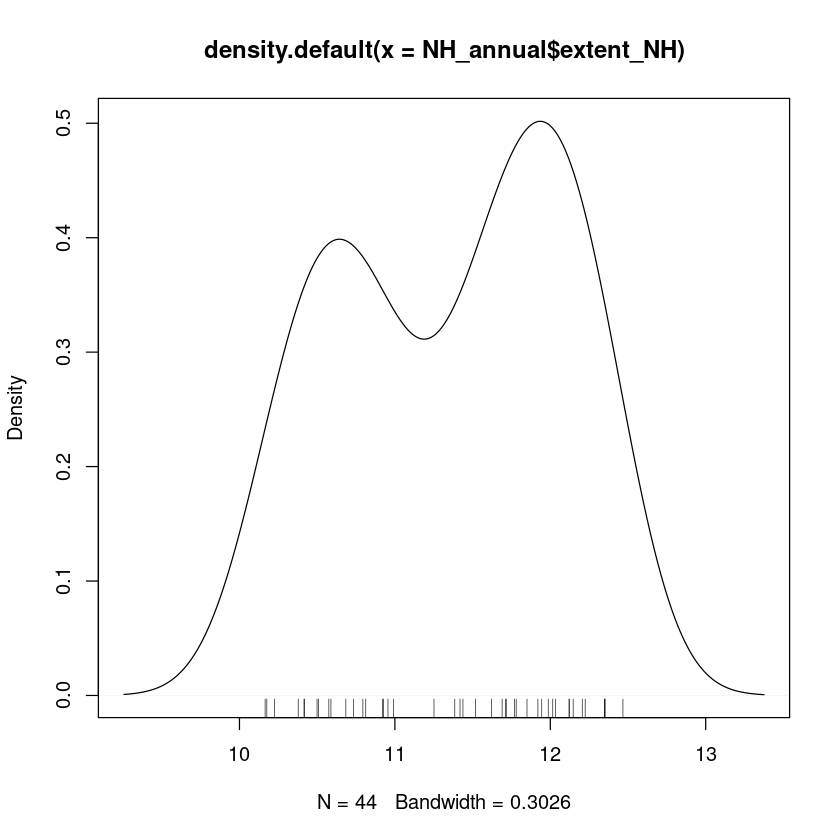

In [224]:
# I learned about density plot from
# https://clauswilke.com/dataviz/histograms-density-plots.html
# https://homepage.divms.uiowa.edu/~luke/classes/STAT4580/histdens.html
plot(density(NH_annual$extent_NH))
rug(jitter(NH_annual$extent_NH))

In [225]:
# only for the annual

# # To quantify this decrease, we will make a linear regression line to know the yearly decrease.

# # Calculate the linear regression equation and R value
# lm_model <- lm(NH_annual ~ year, data = NH_monthly)
# equation <- paste0("y = ", round(coef(lm_model)[1], 2), " + ", round(coef(lm_model)[2], 2), "x")
# r_value <- round(summary(lm_model)$r.squared, 2)

# # Add the equation and R value to the graph
# ggplot(NH_monthly, aes(x = year, y = extent_NH)) +
#   geom_point() +
#   geom_smooth(method = "lm", se = FALSE) +
#   labs(x = "Year", y = "Extent (NH)") +
#   theme_minimal() +
#   annotate("text", x = max(NH_monthly$year), y = max(NH_monthly$extent_NH), 
#            label = paste0("Equation: ", equation, "\nR value: ", r_value), 
#            hjust = 1, vjust = 1)